## Sentiment Analysis of Tweets: Beyond Meat
1. Scrape 8000 tweets (6000 to train machine learning model, 2000 to test machine learning model) for "beyond burger" search terms
2. Create training sets by analyzing tweets for positive (0) or negative (1) sentiment using a rule-based method called VADER
3. Visualize positive and negative training sets of tweets in word clouds to gain familiarity with each set
4. Compare combinations of feature extraction methods (Bag-of-Words and TF-IDF) and machine learning models (Logistic Regression, XGBoost, Decision Trees) to find the combination with the highest F1 score
5. Train machine learning model using features extracted from training sets of tweets
6. Apply trained machine learning model to predict sentiments of tweets in test sets

### Scrapping Tweets

In [ ]:
#conda install git

In [1]:
!pip install git+https://github.com/JustAnotherArchivist/snscrape.git

  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /private/var/folders/hk/p3w5d8wn5q5bf3xm792vrh9w0000gp/T/pip-req-build-6c6_dhxs
  Running command git clone -q https://github.com/JustAnotherArchivist/snscrape.git /private/var/folders/hk/p3w5d8wn5q5bf3xm792vrh9w0000gp/T/pip-req-build-6c6_dhxs


In [1]:
import os

In [2]:
import pandas as pd

In [3]:
tweet_count = 8000
text_query = "beyond burger"
since_date = "2020-01-01"
until_date = "2022-01-01"

In [4]:
os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> beyond_text_training_tweets.json'.format(tweet_count, since_date, text_query, until_date))

0

In [5]:
tweets_df = pd.read_json('beyond_text_training_tweets.json', lines=True)

In [6]:
tweets_df

_type  \
0     snscrape.modules.twitter.Tweet   
1     snscrape.modules.twitter.Tweet   
2     snscrape.modules.twitter.Tweet   
3     snscrape.modules.twitter.Tweet   
4     snscrape.modules.twitter.Tweet   
...                              ...   
7995  snscrape.modules.twitter.Tweet   
7996  snscrape.modules.twitter.Tweet   
7997  snscrape.modules.twitter.Tweet   
7998  snscrape.modules.twitter.Tweet   
7999  snscrape.modules.twitter.Tweet   

                                                    url  \
0     https://twitter.com/djfreedomlives/status/1477...   
1     https://twitter.com/LBethstrong/status/1477051...   
2     https://twitter.com/ADarkenedShroud/status/147...   
3     https://twitter.com/cgrace1998/status/14770214...   
4     https://twitter.com/MaoistFrigg/status/1477010...   
...                                                 ...   
7995  https://twitter.com/goindownnnnn/status/143351...   
7996  https://twitter.com/TwoButtonsDeep/status/1433...   
7997  https://twitter.com/xxfantasythin/status/14335...   
7998  https://twitter.com/rainismsm/status/143351501...   
7999  https://twitter.com/Dawesomedawson/status/1433...   

                          date  \
0    2021-12-31 23:35:43+00:00   
1    2021-12-31 22:56:52+00:00   
2    2021-12-31 22:37:01+00:00   
3    2021-12-31 20:58:59+00:00   
4    2021-12-31 20:16:57+00:00   
...                        ...   
7995 2021-09-02 19:50:39+00:00   
7996 2021-09-02 19:49:44+00:00   
7997 2021-09-02 19:48:45+00:00   
7998 2021-09-02 19:39:47+00:00   
7999 2021-09-02 19:14:33+00:00   

                                                content  \
0     Just posted a photo @ KX burger &amp; beyond h...   
1     @tonyposnanski Dutch Stew. \nBeyond Beef burge...   
2     @TheStanitarium @FeedbackNFuzz I still make Im...   
3     Well, Merry Christmas to us. @blackstone final...   
4     @Jeniferium I wish beyond burgers had actual e...   
...                                                 ...   
7995  I've been restricting really well lately and n...   
7996  .@1BillyFloyd tries the Buffalo Beyond Burger ...   
7997  @SkinnySativa_ Chicken Soup Dumplings, everyth...   
7998              got beyond burgers on sale at tesco😎😎   
7999  @josiahmortimer 😊\n\nViv era shawarma kebab, b...   

                                        renderedContent                   id  \
0     Just posted a photo @ KX burger &amp; beyond i...  1477060930781519880   
1     @tonyposnanski Dutch Stew. \nBeyond Beef burge...  1477051155620548609   
2     @TheStanitarium @FeedbackNFuzz I still make Im...  1477046159785009153   
3     Well, Merry Christmas to us. @blackstone final...  1477021488041672708   
4     @Jeniferium I wish beyond burgers had actual e...  1477010912930377730   
...                                                 ...                  ...   
7995  I've been restricting really well lately and n...  1433517749993607175   
7996  .@1BillyFloyd tries the Buffalo Beyond Burger ...  1433517519202041863   
7997  @SkinnySativa_ Chicken Soup Dumplings, everyth...  1433517272920961030   
7998              got beyond burgers on sale at tesco😎😎  1433515012488826885   
7999  @josiahmortimer 😊\n\nViv era shawarma kebab, b...  1433508662925008902   

                                                   user  replyCount  \
0     {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1     {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2     {'_type': 'snscrape.modules.twitter.User', 'us...           1   
3     {'_type': 'snscrape.modules.twitter.User', 'us...           1   
4     {'_type': 'snscrape.modules.twitter.User', 'us...           0   
...                                                 ...         ...   
7995  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
7996  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
7997  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
7998  {'_type': 'snscrape.modules.twitter.User', 'us

In [7]:
# Removing unnecessary columns and renaming few columns
tweets_df.drop(['_type','renderedContent','user','conversationId','source','sourceUrl','media','retweetedTweet','quotedTweet','inReplyToTweetId','inReplyToUser','mentionedUsers','coordinates','place','hashtags','cashtags','card'], axis=1, inplace=True)
tweets_df.rename(columns={'date':'date_and_time','content':'tweet','id':'tweet_id'}, inplace=True)

In [8]:
tweets_df

url  \
0     https://twitter.com/djfreedomlives/status/1477...   
1     https://twitter.com/LBethstrong/status/1477051...   
2     https://twitter.com/ADarkenedShroud/status/147...   
3     https://twitter.com/cgrace1998/status/14770214...   
4     https://twitter.com/MaoistFrigg/status/1477010...   
...                                                 ...   
7995  https://twitter.com/goindownnnnn/status/143351...   
7996  https://twitter.com/TwoButtonsDeep/status/1433...   
7997  https://twitter.com/xxfantasythin/status/14335...   
7998  https://twitter.com/rainismsm/status/143351501...   
7999  https://twitter.com/Dawesomedawson/status/1433...   

                 date_and_time  \
0    2021-12-31 23:35:43+00:00   
1    2021-12-31 22:56:52+00:00   
2    2021-12-31 22:37:01+00:00   
3    2021-12-31 20:58:59+00:00   
4    2021-12-31 20:16:57+00:00   
...                        ...   
7995 2021-09-02 19:50:39+00:00   
7996 2021-09-02 19:49:44+00:00   
7997 2021-09-02 19:48:45+00:00   
7998 2021-09-02 19:39:47+00:00   
7999 2021-09-02 19:14:33+00:00   

                                                  tweet             tweet_id  \
0     Just posted a photo @ KX burger &amp; beyond h...  1477060930781519880   
1     @tonyposnanski Dutch Stew. \nBeyond Beef burge...  1477051155620548609   
2     @TheStanitarium @FeedbackNFuzz I still make Im...  1477046159785009153   
3     Well, Merry Christmas to us. @blackstone final...  1477021488041672708   
4     @Jeniferium I wish beyond burgers had actual e...  1477010912930377730   
...                                                 ...                  ...   
7995  I've been restricting really well lately and n...  1433517749993607175   
7996  .@1BillyFloyd tries the Buffalo Beyond Burger ...  1433517519202041863   
7997  @SkinnySativa_ Chicken Soup Dumplings, everyth...  1433517272920961030   
7998              got beyond burgers on sale at tesco😎😎  1433515012488826885   
7999  @josiahmortimer 😊\n\nViv era shawarma kebab, b...  1433508662925008902   

      replyCount  retweetCount  likeCount  quoteCount lang  \
0              0             0          0           0   en   
1              0             0          0           0   en   
2              1             0          1           0   en   
3              1             0          0           1   en   
4              0             0          1           0   en   
...          ...           ...        ...         ...  ...   
7995           0             0          0           0   en   
7996           0             1          4           1   en   
7997           0             0          0           0   en   
7998           0             0          4           0   en   
7999           2             0          2           0   en   

              sourceLabel                                              links  
0               Instagram  [{'_type': 'snscrape.modules.twitter.TextLink'...  
1     Twitter for Android                                               None  
2         Twitter Web App                                               None  
3     Twitter for Android                                               None  
4      Twitter for iPhone                                               None  
...                   ...                                                ...  
7995  Twitter for Android                                               None  
7996   Twitter for iPhone                                               None  
7997   Twitter for iPhone                                               None  
7998   Twitter for iPhone                                               None  
7999   Twitter for iPhone                                               None  

[8000 rows x 11 columns]

In [9]:
tweets_df.to_csv('beyond_text_training_tweets.csv', sep=',', index=False)

### Create training sets by analyzing tweets for positive (0) or negative (1) sentiment using VADER

In [10]:
import re
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [11]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nidhicoundal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [13]:
# Reading only 75% of total tweets i.e. 6000
df = pd.read_csv('beyond_text_training_tweets.csv', nrows=6000)

In [14]:
df

url  \
0     https://twitter.com/djfreedomlives/status/1477...   
1     https://twitter.com/LBethstrong/status/1477051...   
2     https://twitter.com/ADarkenedShroud/status/147...   
3     https://twitter.com/cgrace1998/status/14770214...   
4     https://twitter.com/MaoistFrigg/status/1477010...   
...                                                 ...   
5995  https://twitter.com/LivingPopRocks/status/1443...   
5996  https://twitter.com/writerBLMcGrew/status/1443...   
5997  https://twitter.com/HeidiSchulz/status/1443035...   
5998  https://twitter.com/ajsymonee/status/144303388...   
5999  https://twitter.com/smallcreature99/status/144...   

                  date_and_time  \
0     2021-12-31 23:35:43+00:00   
1     2021-12-31 22:56:52+00:00   
2     2021-12-31 22:37:01+00:00   
3     2021-12-31 20:58:59+00:00   
4     2021-12-31 20:16:57+00:00   
...                         ...   
5995  2021-09-29 02:18:16+00:00   
5996  2021-09-29 02:13:54+00:00   
5997  2021-09-29 02:10:08+00:00   
5998  2021-09-29 02:04:23+00:00   
5999  2021-09-29 01:39:22+00:00   

                                                  tweet             tweet_id  \
0     Just posted a photo @ KX burger &amp; beyond h...  1477060930781519880   
1     @tonyposnanski Dutch Stew. \nBeyond Beef burge...  1477051155620548609   
2     @TheStanitarium @FeedbackNFuzz I still make Im...  1477046159785009153   
3     Well, Merry Christmas to us. @blackstone final...  1477021488041672708   
4     @Jeniferium I wish beyond burgers had actual e...  1477010912930377730   
...                                                 ...                  ...   
5995  I am so beyond mentally ill - like the beyond ...  1443037380991193096   
5996  @HeidiSchulz @ginad129 I would suggest Impossi...  1443036283543199746   
5997  @writerBLMcGrew @ginad129 I like Beyond Burger...  1443035333155692544   
5998  Nun just na getting up to fix my burger 🥴ho fi...  1443033887781830658   
5999  dinner was:\n• beyond burger with mayonnaise m...  1443027592051937282   

      replyCount  retweetCount  likeCount  quoteCount lang  \
0              0             0          0           0   en   
1              0             0          0           0   en   
2              1             0          1           0   en   
3              1             0          0           1   en   
4              0             0          1           0   en   
...          ...           ...        ...         ...  ...   
5995           0             0          2           0   en   
5996           1             0          1           0   en   
5997           3             0          1           0   en   
5998           0             0          0           0   en   
5999           3             0         11           0   en   

              sourceLabel                                              links  
0               Instagram  [{'_type': 'snscrape.modules.twitter.TextLink'...  
1     Twitter for Android                                                NaN  
2         Twitter Web App                                                NaN  
3     Twitter for Android                                                NaN  
4      Twitter for iPhone                                                NaN  
...                   ...                                                ...  
5995  Twitter for Android                                                NaN  
5996   Twitter for iPhone                                                NaN  
5997      Twitter Web App                                                NaN  
5998   Twitter for iPhone                                                NaN  
5999   Twitter for iPhone                                                NaN  

[6000 rows x 11 columns]

In [15]:
df.columns

Index(['url', 'date_and_time', 'tweet', 'tweet_id', 'replyCount',
       'retweetCount', 'likeCount', 'quoteCount', 'lang', 'sourceLabel',
       'links'],
      dtype='object')

In [16]:
negative = []
neutral = []
positive = []
compound = []

sid = SentimentIntensityAnalyzer()

In [17]:
for i in df.index:
    scores = sid.polarity_scores(df['tweet'].iloc[i])
    negative.append(scores['neg'])
    neutral.append(scores['neu'])
    positive.append(scores['pos'])
    compound.append(scores['compound'])

In [18]:
df['negative'] = negative
df['neutral'] = neutral
df['positive'] = positive
df['compound'] = compound

In [19]:
df.index

RangeIndex(start=0, stop=6000, step=1)

In [20]:
df

url  \
0     https://twitter.com/djfreedomlives/status/1477...   
1     https://twitter.com/LBethstrong/status/1477051...   
2     https://twitter.com/ADarkenedShroud/status/147...   
3     https://twitter.com/cgrace1998/status/14770214...   
4     https://twitter.com/MaoistFrigg/status/1477010...   
...                                                 ...   
5995  https://twitter.com/LivingPopRocks/status/1443...   
5996  https://twitter.com/writerBLMcGrew/status/1443...   
5997  https://twitter.com/HeidiSchulz/status/1443035...   
5998  https://twitter.com/ajsymonee/status/144303388...   
5999  https://twitter.com/smallcreature99/status/144...   

                  date_and_time  \
0     2021-12-31 23:35:43+00:00   
1     2021-12-31 22:56:52+00:00   
2     2021-12-31 22:37:01+00:00   
3     2021-12-31 20:58:59+00:00   
4     2021-12-31 20:16:57+00:00   
...                         ...   
5995  2021-09-29 02:18:16+00:00   
5996  2021-09-29 02:13:54+00:00   
5997  2021-09-29 02:10:08+00:00   
5998  2021-09-29 02:04:23+00:00   
5999  2021-09-29 01:39:22+00:00   

                                                  tweet             tweet_id  \
0     Just posted a photo @ KX burger &amp; beyond h...  1477060930781519880   
1     @tonyposnanski Dutch Stew. \nBeyond Beef burge...  1477051155620548609   
2     @TheStanitarium @FeedbackNFuzz I still make Im...  1477046159785009153   
3     Well, Merry Christmas to us. @blackstone final...  1477021488041672708   
4     @Jeniferium I wish beyond burgers had actual e...  1477010912930377730   
...                                                 ...                  ...   
5995  I am so beyond mentally ill - like the beyond ...  1443037380991193096   
5996  @HeidiSchulz @ginad129 I would suggest Impossi...  1443036283543199746   
5997  @writerBLMcGrew @ginad129 I like Beyond Burger...  1443035333155692544   
5998  Nun just na getting up to fix my burger 🥴ho fi...  1443033887781830658   
5999  dinner was:\n• beyond burger with mayonnaise m...  1443027592051937282   

      replyCount  retweetCount  likeCount  quoteCount lang  \
0              0             0          0           0   en   
1              0             0          0           0   en   
2              1             0          1           0   en   
3              1             0          0           1   en   
4              0             0          1           0   en   
...          ...           ...        ...         ...  ...   
5995           0             0          2           0   en   
5996           1             0          1           0   en   
5997           3             0          1           0   en   
5998           0             0          0           0   en   
5999           3             0         11           0   en   

              sourceLabel                                              links  \
0               Instagram  [{'_type': 'snscrape.modules.twitter.TextLink'...   
1     Twitter for Android                                                NaN   
2         Twitter Web App                                                NaN   
3     Twitter for Android                                                NaN   
4      Twitter for iPhone                                                NaN   
...                   ...                                                ...   
5995  Twitter for Android                                                NaN   
5996   Twitter for iPhone                                                NaN   
5997      Twitter Web App                                                NaN   
5998   Twitter for iPhone                                                NaN   
5999   Twitter for iPhone                                                NaN   

      negative  neutral  positive  compound  
0        0.000    1.000     0.000    0.0000  
1        0.059    0.856     0.086    0.2500  
2        0.000    0.950     0.050    0.2732  
3        0.184    0.680     0.136   -0.2500  
4        0.000    0.748  

In [21]:
# Creating independent variable - sentiment_label
df['sentiment_label'] = ''
for i in range(len(df)):
    if df['compound'][i] < 0:
        df['sentiment_label'][i] = 1
    else:
        df['sentiment_label'][i] = 0

<ipython-input-21-2daf4d19fb4a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'][i] = 0
<ipython-input-21-2daf4d19fb4a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_label'][i] = 1


In [40]:
df.to_csv('final_beyond_text_training_tweets.csv', index=False)

### Visualize positive and negative tweets in word clouds¶

In [22]:
train = pd.read_csv('final_beyond_text_training_tweets.csv')

In [23]:
train

url  \
0     https://twitter.com/djfreedomlives/status/1477...   
1     https://twitter.com/LBethstrong/status/1477051...   
2     https://twitter.com/ADarkenedShroud/status/147...   
3     https://twitter.com/cgrace1998/status/14770214...   
4     https://twitter.com/MaoistFrigg/status/1477010...   
...                                                 ...   
5995  https://twitter.com/tametick/status/1443188209...   
5996  https://twitter.com/GrammaNumnums/status/14431...   
5997  https://twitter.com/JundyLundy/status/14431393...   
5998  https://twitter.com/Holofech/status/1443119835...   
5999  https://twitter.com/DesignerErica27/status/144...   

                  date_and_time  \
0     2021-12-31 23:35:43+00:00   
1     2021-12-31 22:56:52+00:00   
2     2021-12-31 22:37:01+00:00   
3     2021-12-31 20:58:59+00:00   
4     2021-12-31 20:16:57+00:00   
...                         ...   
5995  2021-09-29 12:17:37+00:00   
5996  2021-09-29 12:08:52+00:00   
5997  2021-09-29 09:03:27+00:00   
5998  2021-09-29 07:45:55+00:00   
5999  2021-09-29 06:46:02+00:00   

                                                  tweet             tweet_id  \
0     Just posted a photo @ KX burger &amp; beyond h...  1477060930781519880   
1     @tonyposnanski Dutch Stew. \nBeyond Beef burge...  1477051155620548609   
2     @TheStanitarium @FeedbackNFuzz I still make Im...  1477046159785009153   
3     Well, Merry Christmas to us. @blackstone final...  1477021488041672708   
4     @Jeniferium I wish beyond burgers had actual e...  1477010912930377730   
...                                                 ...                  ...   
5995  @docsquiddy i'd even say the bread circumferen...  1443188209882746886   
5996  @wildthang1471 @JoeManchinWV Exactly right abo...  1443186009492148226   
5997  Looking at beyond burgers and oat milk labels ...  1443139350179598337   
5998  @csd_gay @Fembub canadian a&amp;w beyond burge...  1443119835303628800   
5999  @jasaz9812 @BellaGartner @GovRonDeSantis Every...  1443104765983006722   

      replyCount  retweetCount  likeCount  quoteCount lang  \
0              0             0          0           0   en   
1              0             0          0           0   en   
2              1             0          1           0   en   
3              1             0          0           1   en   
4              0             0          1           0   en   
...          ...           ...        ...         ...  ...   
5995           0             0          0           0   en   
5996           1             0          2           0   en   
5997           0             0          1           0   en   
5998           0             0          1           0   en   
5999           0             0          0           0   en   

              sourceLabel                                              links  \
0               Instagram  [{'_type': 'snscrape.modules.twitter.TextLink'...   
1     Twitter for Android                                                NaN   
2         Twitter Web App                                                NaN   
3     Twitter for Android                                                NaN   
4      Twitter for iPhone                                                NaN   
...                   ...                                                ...   
5995      Twitter Web App                                                NaN   
5996  Twitter for Android                                                NaN   
5997  Twitter for Android  [{'_type': 'snscrape.modules.twitter.TextLink'...   
5998   Twitter for iPhone                                                NaN   
5999   Twitter for iPhone                                                NaN   

      negative  neutral  positive  compound  sentiment_label  
0        0.000    1.000     0.000    0.0000                0  
1        0.059    0.856     0.086    0.2500                0  
2        0.000    0.950     0.050    0.2732                0  
3  

In [25]:
train_original=train.copy()

In [26]:
test = pd.read_csv('beyond_text_training_tweets.csv', skiprows=range(1, 6001))

In [27]:
test

url  \
0     https://twitter.com/Talk_To_The_Hat/status/144...   
1     https://twitter.com/joelgarry/status/144301833...   
2     https://twitter.com/TKDano/status/144301199533...   
3     https://twitter.com/mshopper51/status/14430113...   
4     https://twitter.com/chollatucson/status/144301...   
...                                                 ...   
1995  https://twitter.com/goindownnnnn/status/143351...   
1996  https://twitter.com/TwoButtonsDeep/status/1433...   
1997  https://twitter.com/xxfantasythin/status/14335...   
1998  https://twitter.com/rainismsm/status/143351501...   
1999  https://twitter.com/Dawesomedawson/status/1433...   

                  date_and_time  \
0     2021-09-29 01:03:02+00:00   
1     2021-09-29 01:02:36+00:00   
2     2021-09-29 00:37:24+00:00   
3     2021-09-29 00:34:59+00:00   
4     2021-09-29 00:32:11+00:00   
...                         ...   
1995  2021-09-02 19:50:39+00:00   
1996  2021-09-02 19:49:44+00:00   
1997  2021-09-02 19:48:45+00:00   
1998  2021-09-02 19:39:47+00:00   
1999  2021-09-02 19:14:33+00:00   

                                                  tweet             tweet_id  \
0     Beyond Meat!\n\nA) A book about astral project...  1443018446128754694   
1     @wildethingy A Beyond Burger with spray cheese...  1443018339463274511   
2     @sarahannelloyd I am so disappointed by all th...  1443011995339354115   
3     Better Than Beyond Veggie Burgers https://t.co...  1443011389950337033   
4     @kingmanmarie39 legumes are such a great way t...  1443010682203480065   
...                                                 ...                  ...   
1995  I've been restricting really well lately and n...  1433517749993607175   
1996  .@1BillyFloyd tries the Buffalo Beyond Burger ...  1433517519202041863   
1997  @SkinnySativa_ Chicken Soup Dumplings, everyth...  1433517272920961030   
1998              got beyond burgers on sale at tesco😎😎  1433515012488826885   
1999  @josiahmortimer 😊\n\nViv era shawarma kebab, b...  1433508662925008902   

      replyCount  retweetCount  likeCount  quoteCount lang  \
0             10             5         38           1   en   
1              0             0          1           0   en   
2              0             0          1           0   en   
3              0             0          0           0   en   
4              0             1          2           0   en   
...          ...           ...        ...         ...  ...   
1995           0             0          0           0   en   
1996           0             1          4           1   en   
1997           0             0          0           0   en   
1998           0             0          4           0   en   
1999           2             0          2           0   en   

              sourceLabel                                              links  
0         Twitter Web App                                                NaN  
1         Twitter Web App                                                NaN  
2         Twitter Web App                                                NaN  
3         Twitter Web App  [{'_type': 'snscrape.modules.twitter.TextLink'...  
4         Twitter Web App                                                NaN  
...                   ...                                                ...  
1995  Twitter for Android                                                NaN  
1996   Twitter for iPhone                                                NaN  
1997   Twitter for iPhone                                                NaN  
1998   Twitter for iPhone                                                NaN  
1999   Twitter for iPhone                                                NaN  

[2000 rows x 11 columns]

In [28]:
test_original=test.copy()

In [29]:
test_original.to_csv('beyond_test_tweets.csv', index=False)

In [30]:
combine = train.append(test,ignore_index=True)

In [31]:
combine

url  \
0     https://twitter.com/djfreedomlives/status/1477...   
1     https://twitter.com/LBethstrong/status/1477051...   
2     https://twitter.com/ADarkenedShroud/status/147...   
3     https://twitter.com/cgrace1998/status/14770214...   
4     https://twitter.com/MaoistFrigg/status/1477010...   
...                                                 ...   
7995  https://twitter.com/goindownnnnn/status/143351...   
7996  https://twitter.com/TwoButtonsDeep/status/1433...   
7997  https://twitter.com/xxfantasythin/status/14335...   
7998  https://twitter.com/rainismsm/status/143351501...   
7999  https://twitter.com/Dawesomedawson/status/1433...   

                  date_and_time  \
0     2021-12-31 23:35:43+00:00   
1     2021-12-31 22:56:52+00:00   
2     2021-12-31 22:37:01+00:00   
3     2021-12-31 20:58:59+00:00   
4     2021-12-31 20:16:57+00:00   
...                         ...   
7995  2021-09-02 19:50:39+00:00   
7996  2021-09-02 19:49:44+00:00   
7997  2021-09-02 19:48:45+00:00   
7998  2021-09-02 19:39:47+00:00   
7999  2021-09-02 19:14:33+00:00   

                                                  tweet             tweet_id  \
0     Just posted a photo @ KX burger &amp; beyond h...  1477060930781519880   
1     @tonyposnanski Dutch Stew. \nBeyond Beef burge...  1477051155620548609   
2     @TheStanitarium @FeedbackNFuzz I still make Im...  1477046159785009153   
3     Well, Merry Christmas to us. @blackstone final...  1477021488041672708   
4     @Jeniferium I wish beyond burgers had actual e...  1477010912930377730   
...                                                 ...                  ...   
7995  I've been restricting really well lately and n...  1433517749993607175   
7996  .@1BillyFloyd tries the Buffalo Beyond Burger ...  1433517519202041863   
7997  @SkinnySativa_ Chicken Soup Dumplings, everyth...  1433517272920961030   
7998              got beyond burgers on sale at tesco😎😎  1433515012488826885   
7999  @josiahmortimer 😊\n\nViv era shawarma kebab, b...  1433508662925008902   

      replyCount  retweetCount  likeCount  quoteCount lang  \
0              0             0          0           0   en   
1              0             0          0           0   en   
2              1             0          1           0   en   
3              1             0          0           1   en   
4              0             0          1           0   en   
...          ...           ...        ...         ...  ...   
7995           0             0          0           0   en   
7996           0             1          4           1   en   
7997           0             0          0           0   en   
7998           0             0          4           0   en   
7999           2             0          2           0   en   

              sourceLabel                                              links  \
0               Instagram  [{'_type': 'snscrape.modules.twitter.TextLink'...   
1     Twitter for Android                                                NaN   
2         Twitter Web App                                                NaN   
3     Twitter for Android                                                NaN   
4      Twitter for iPhone                                                NaN   
...                   ...                                                ...   
7995  Twitter for Android                                                NaN   
7996   Twitter for iPhone                                                NaN   
7997   Twitter for iPhone                                                NaN   
7998   Twitter for iPhone                                                NaN   
7999   Twitter for iPhone                                                NaN   

      negative  neutral  positive  compound  sentiment_label  
0        0.000    1.000     0.000    0.0000              0.0  
1        0.059    0.856     0.086    0.2500              0.0  
2        0.000    0.950     0.050    0.2732              0.0  
3  

### Cleaning / Preprocessing Tweets -  
1. Remove Twitter handles
2. Remove punctuation, numbers, special characters
3. Remove short words
4. Tokenize tweets
5. Stem tweets
6. Recombine tokens

In [32]:
def remove_pattern(text,pattern):
    
    r = re.findall(pattern,text)
    
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [33]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")

In [34]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")

<ipython-input-34-cd036dace8e1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")


In [35]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [36]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())

In [37]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [38]:
tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

In [39]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [40]:
combine['Tidy_Tweets'] = tokenized_tweet

In [41]:
combine

url  \
0     https://twitter.com/djfreedomlives/status/1477...   
1     https://twitter.com/LBethstrong/status/1477051...   
2     https://twitter.com/ADarkenedShroud/status/147...   
3     https://twitter.com/cgrace1998/status/14770214...   
4     https://twitter.com/MaoistFrigg/status/1477010...   
...                                                 ...   
7995  https://twitter.com/goindownnnnn/status/143351...   
7996  https://twitter.com/TwoButtonsDeep/status/1433...   
7997  https://twitter.com/xxfantasythin/status/14335...   
7998  https://twitter.com/rainismsm/status/143351501...   
7999  https://twitter.com/Dawesomedawson/status/1433...   

                  date_and_time  \
0     2021-12-31 23:35:43+00:00   
1     2021-12-31 22:56:52+00:00   
2     2021-12-31 22:37:01+00:00   
3     2021-12-31 20:58:59+00:00   
4     2021-12-31 20:16:57+00:00   
...                         ...   
7995  2021-09-02 19:50:39+00:00   
7996  2021-09-02 19:49:44+00:00   
7997  2021-09-02 19:48:45+00:00   
7998  2021-09-02 19:39:47+00:00   
7999  2021-09-02 19:14:33+00:00   

                                                  tweet             tweet_id  \
0     Just posted a photo @ KX burger &amp; beyond h...  1477060930781519880   
1     @tonyposnanski Dutch Stew. \nBeyond Beef burge...  1477051155620548609   
2     @TheStanitarium @FeedbackNFuzz I still make Im...  1477046159785009153   
3     Well, Merry Christmas to us. @blackstone final...  1477021488041672708   
4     @Jeniferium I wish beyond burgers had actual e...  1477010912930377730   
...                                                 ...                  ...   
7995  I've been restricting really well lately and n...  1433517749993607175   
7996  .@1BillyFloyd tries the Buffalo Beyond Burger ...  1433517519202041863   
7997  @SkinnySativa_ Chicken Soup Dumplings, everyth...  1433517272920961030   
7998              got beyond burgers on sale at tesco😎😎  1433515012488826885   
7999  @josiahmortimer 😊\n\nViv era shawarma kebab, b...  1433508662925008902   

      replyCount  retweetCount  likeCount  quoteCount lang  \
0              0             0          0           0   en   
1              0             0          0           0   en   
2              1             0          1           0   en   
3              1             0          0           1   en   
4              0             0          1           0   en   
...          ...           ...        ...         ...  ...   
7995           0             0          0           0   en   
7996           0             1          4           1   en   
7997           0             0          0           0   en   
7998           0             0          4           0   en   
7999           2             0          2           0   en   

              sourceLabel                                              links  \
0               Instagram  [{'_type': 'snscrape.modules.twitter.TextLink'...   
1     Twitter for Android                                                NaN   
2         Twitter Web App                                                NaN   
3     Twitter for Android                                                NaN   
4      Twitter for iPhone                                                NaN   
...                   ...                                                ...   
7995  Twitter for Android                                                NaN   
7996   Twitter for iPhone                                                NaN   
7997   Twitter for iPhone                                                NaN   
7998   Twitter for iPhone                                                NaN   
7999   Twitter for iPhone                                                NaN   

      negative  neutral  positive  compound  sentiment_label  \
0        0.000    1.000     0.000    0.0000              0.0   
1        0.059    0.856     0.086    0.2500              0.0   
2        0.000    0.950     0.050    0.2732              0.0   

In [42]:
conda install -c conda-forge wordcloud

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [43]:
from wordcloud import WordCloud
from PIL import Image
import urllib
import requests

In [44]:
stopwords = ['imposs burger', 'imposs', 'burger', 'beyond', 'beyond burger', 'http', 'thi', 'carn', 'that', 'hamburguesa', 'impossibleburg', 'tri', 'they']

### Word cloud of tweets with positive compound sentiment

In [45]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['compound']>0])

In [ ]:
wc_positive = WordCloud(background_color='white', height=1500, width=4000, stopwords=stopwords).generate(all_words_positive)

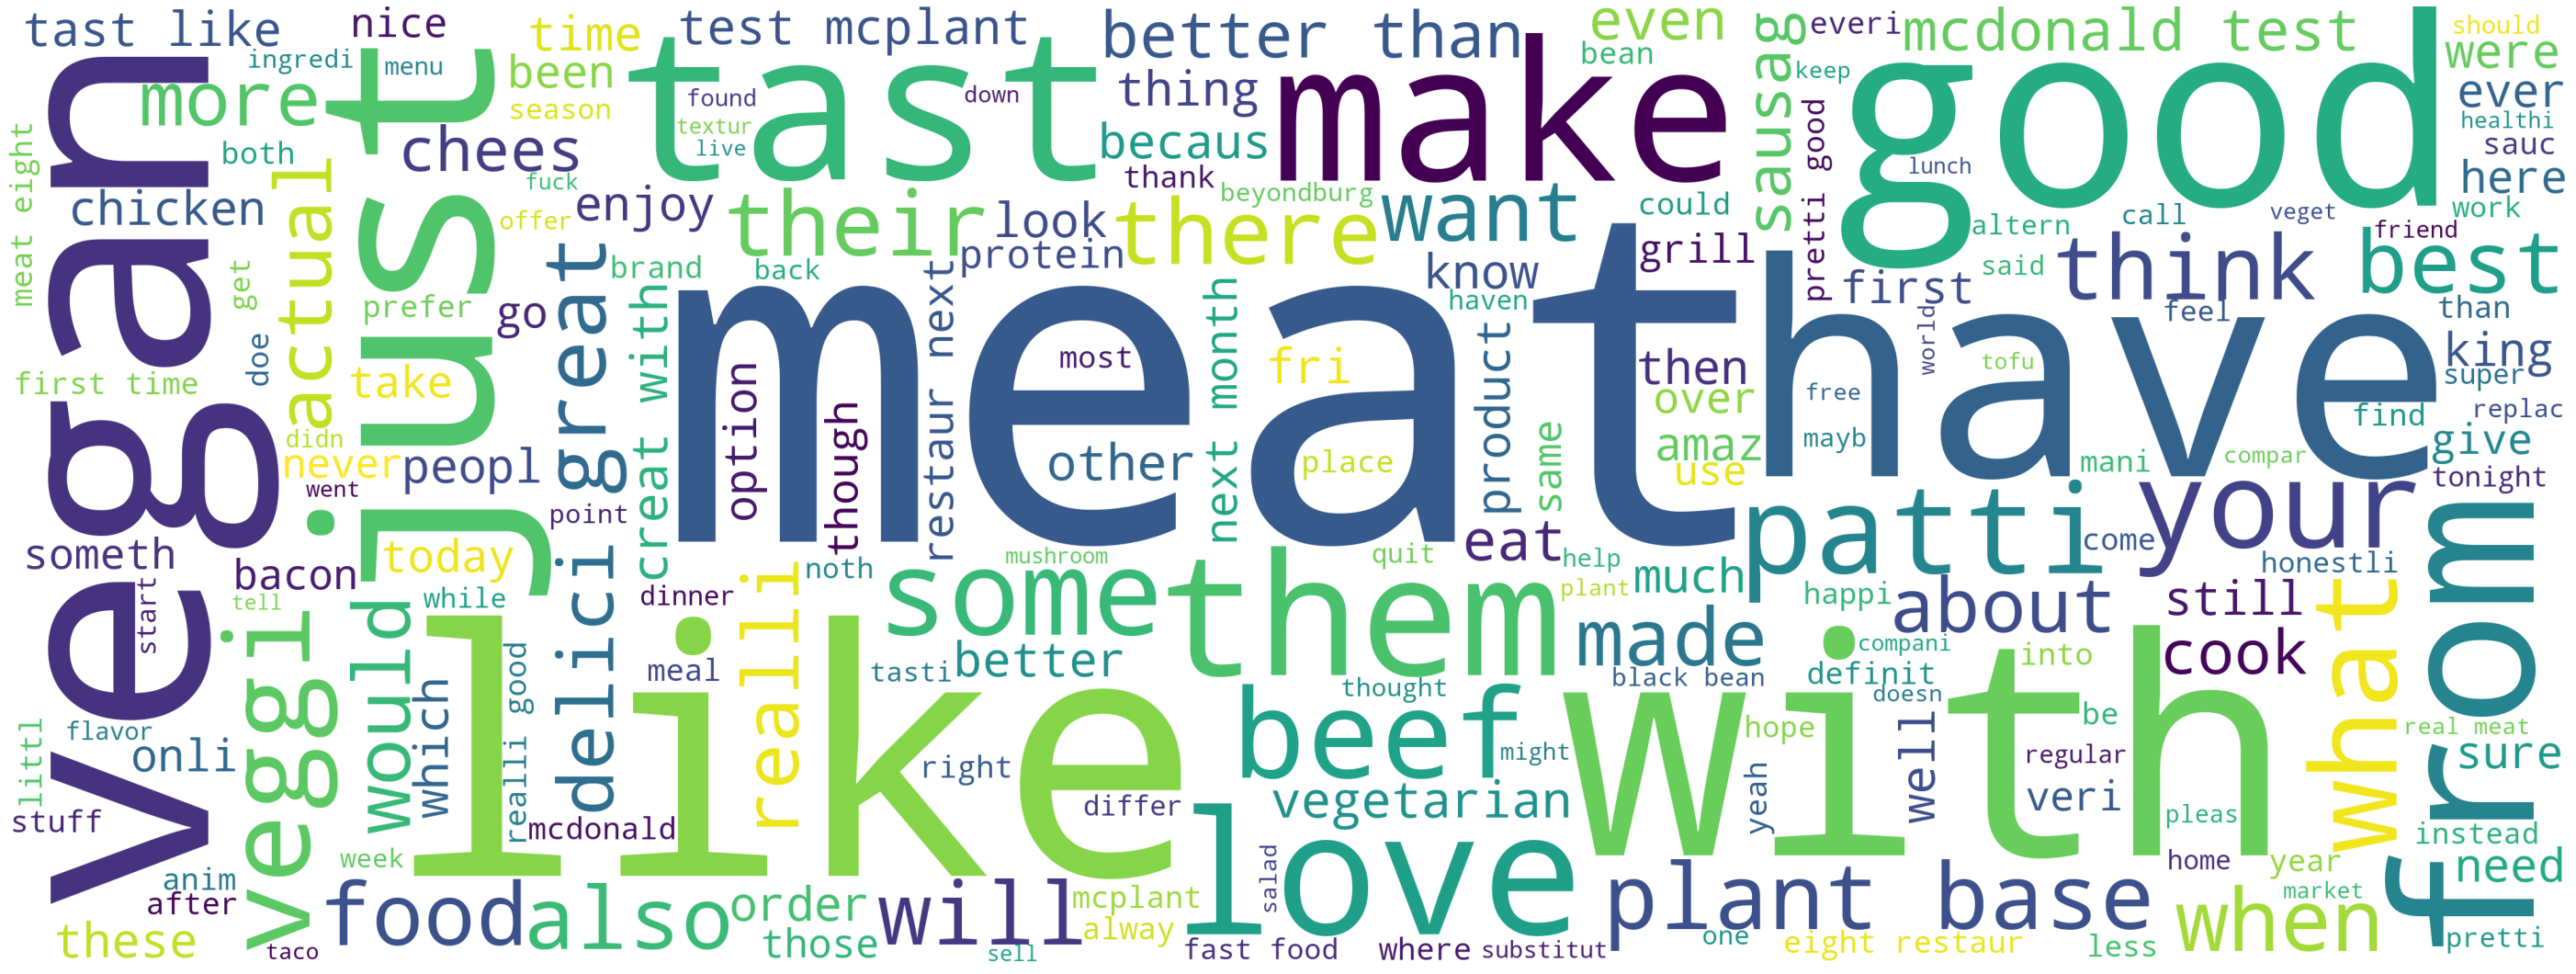

In [65]:
plt.figure(figsize=(50,50))
plt.imshow(wc_positive)
plt.axis('off')
plt.show()

In [47]:
burger_mask = np.array(Image.open("burger3.png"))
burger_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [48]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [49]:
# Transform your mask into a new one that will work with the function:
transformed_burger_mask = np.ndarray((burger_mask.shape[0],burger_mask.shape[1]), np.int32)

for i in range(len(burger_mask)):
    transformed_burger_mask[i] = list(map(transform_format, burger_mask[i]))

In [50]:
# Check the expected result of your mask
transformed_burger_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

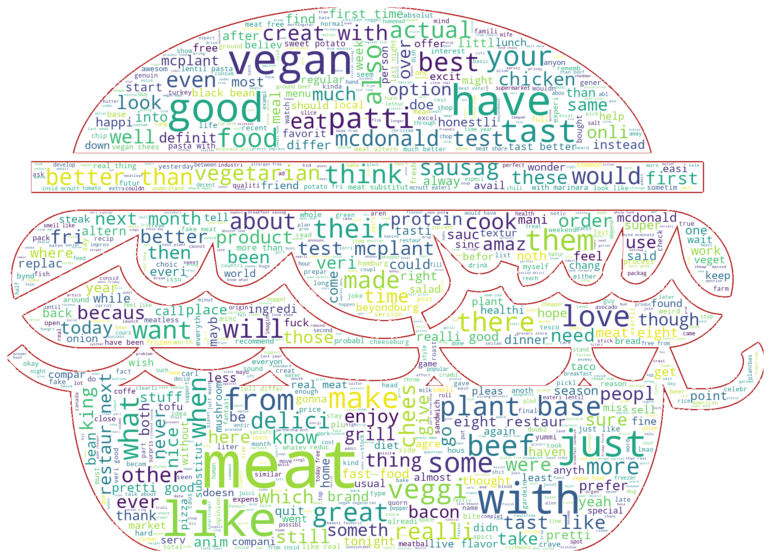

In [51]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_burger_mask,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(all_words_positive)

# store to file
wc.to_file("burger_positive.png")

# show
plt.figure(figsize=[25,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [66]:
wc_positive.to_file('beyond_wc_positive.png')

### Word cloud of tweets with negative compound sentiment

In [86]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['compound']<0])

In [87]:
wc_negative = WordCloud(background_color='white', height=1500, width=4000, stopwords=stopwords).generate(all_words_negative)

In [89]:
burger_mask1 = np.array(Image.open("burger3.png"))
burger_mask1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [90]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [91]:
# Transform your mask into a new one that will work with the function:
transformed_burger_mask1 = np.ndarray((burger_mask1.shape[0],burger_mask1.shape[1]), np.int32)

for i in range(len(burger_mask1)):
    transformed_burger_mask1[i] = list(map(transform_format, burger_mask1[i]))

In [92]:
# Check the expected result of your mask
transformed_burger_mask1

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

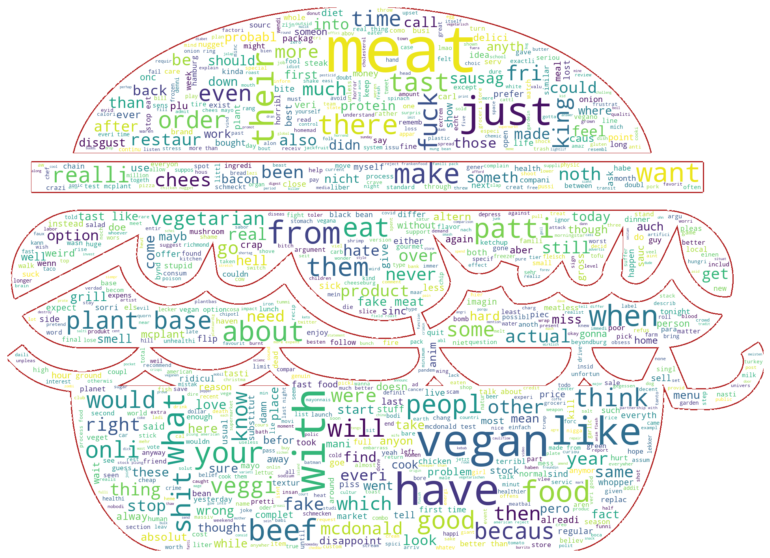

In [93]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_burger_mask1,
               stopwords=stopwords, contour_width=1, contour_color='firebrick')

# Generate a wordcloud
wc.generate(all_words_negative)

# store to file
wc.to_file("burger_negative.png")

# show
plt.figure(figsize=[25,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

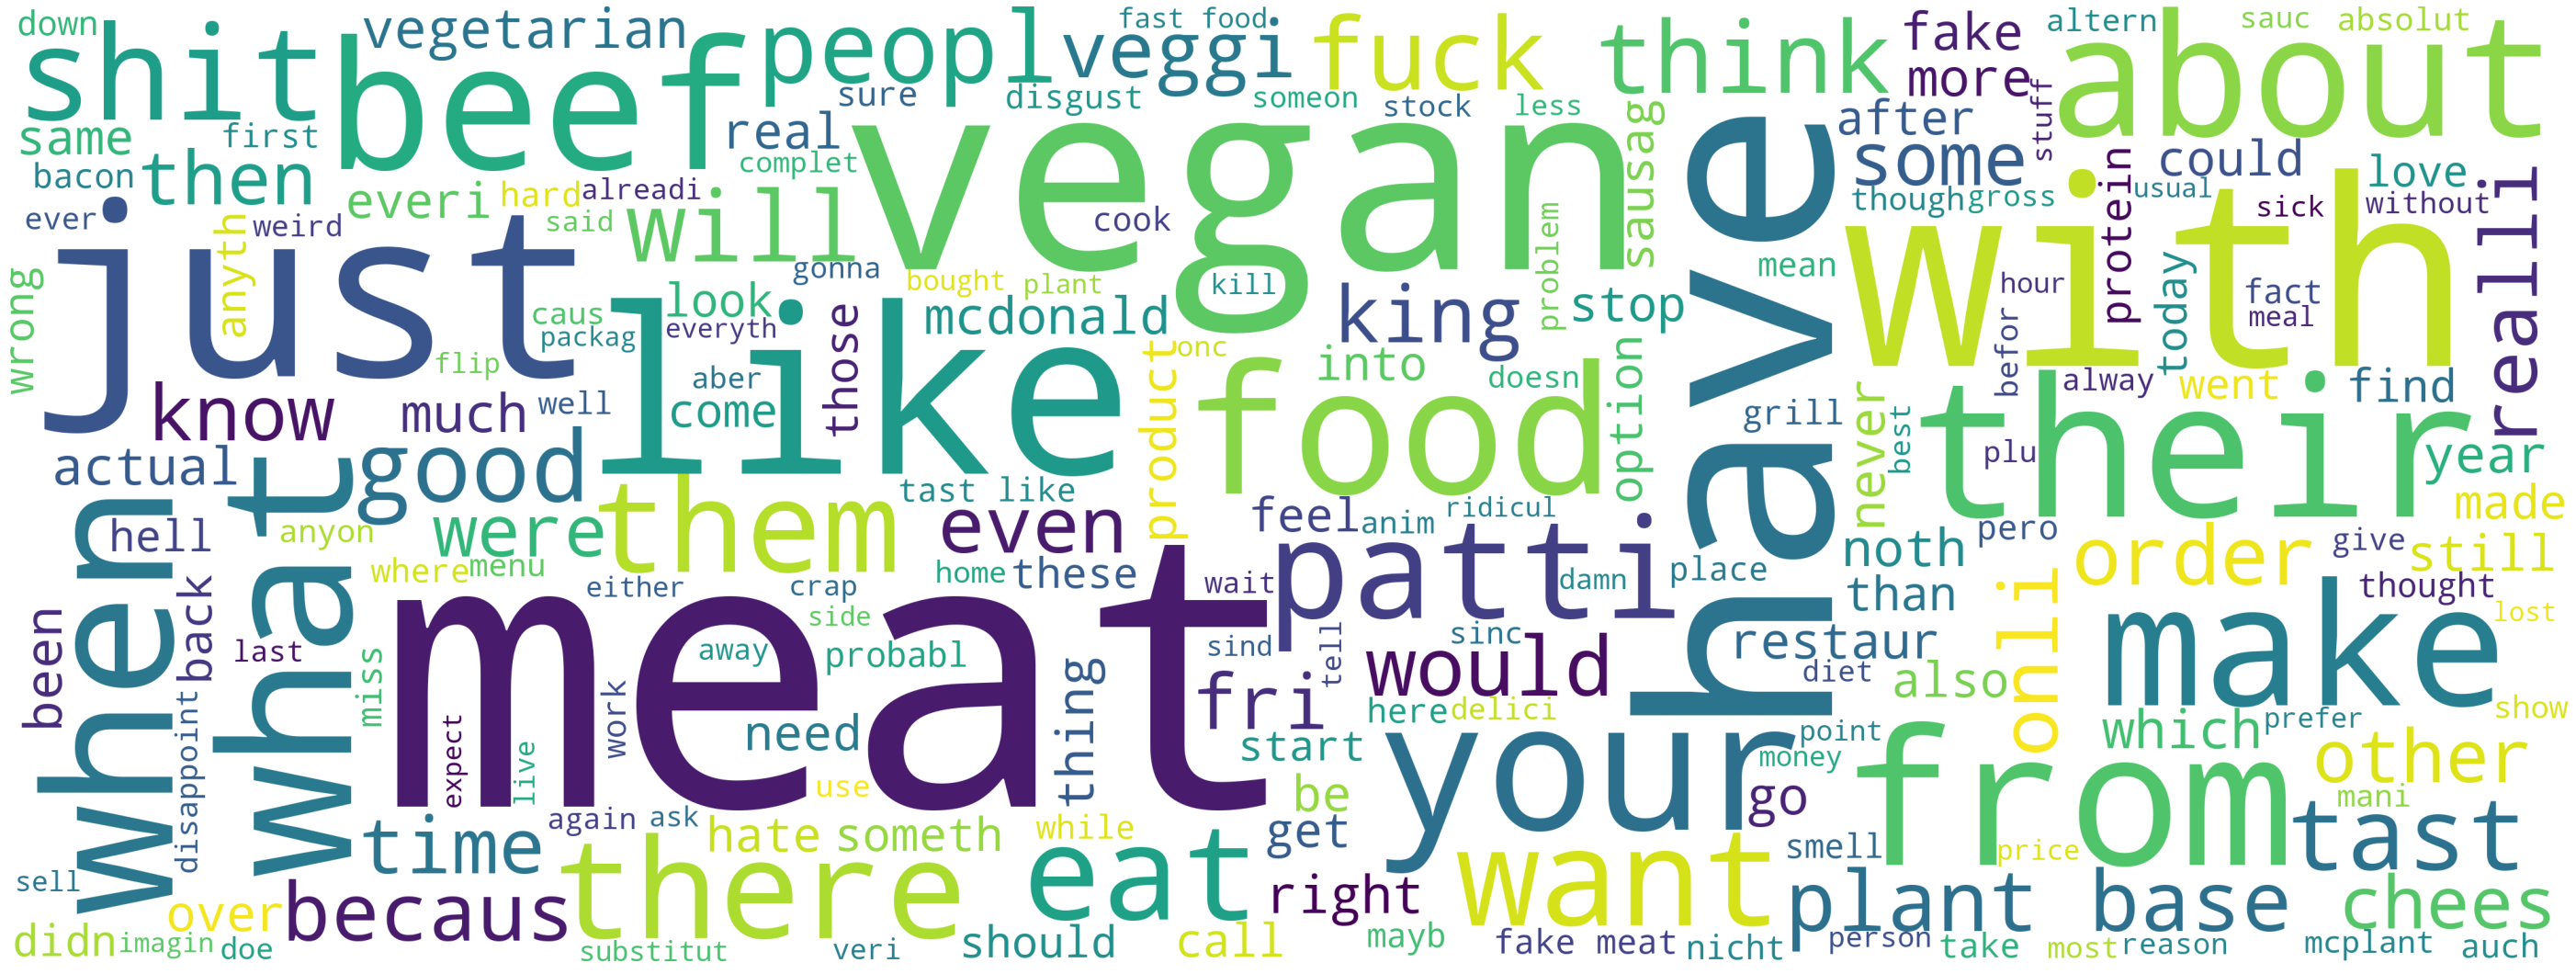

In [88]:
plt.figure(figsize=(50,50))
plt.imshow(wc_negative)
plt.axis('off')
plt.show()

In [97]:
wc_negative.to_file('beyond_wc_negative.png')

### Extract hashtags from tweets with positive compound sentiment

In [52]:
def Hashtags_Extract(x):
    hashtags=[]
    
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [53]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['compound']>0])

In [54]:
ht_positive

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['vegan'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['plantbasedfood'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['veganhour'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['beyondburg', 'itsthatgood', 'meatlessmonday'],
 [],
 [],
 ['vegan'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['murrchrimuh'],
 [],
 [],
 [],
 [],
 ['breadmak', 'dash', 'beyondburg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['deletefacebook'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['uncle

In [55]:
ht_positive_unnest = sum(ht_positive,[])

In [56]:
ht_positive_unnest

['vegan',
 'plantbasedfood',
 'veganhour',
 'beyondburg',
 'itsthatgood',
 'meatlessmonday',
 'vegan',
 'murrchrimuh',
 'breadmak',
 'dash',
 'beyondburg',
 'deletefacebook',
 'unclebillskitchen',
 'beyondburg',
 'food',
 'veganburg',
 'burger',
 'cheeseburg',
 'vegan',
 'cdnmedia',
 'cdnmediafail',
 'bynd',
 'dublin',
 'beyondburg',
 'kimichi',
 'dinnertim',
 'lchf',
 'keto',
 'omad',
 'ketodiet',
 'vegan',
 'pandaexpress',
 'kfc',
 'burgerk',
 'beyondburg',
 'starburst',
 'starbuck',
 'vegan',
 'motn',
 'inabudhabi',
 'motnfestiv',
 'plantbas',
 'diseas',
 'covid',
 'govegan',
 'vegan',
 'veganfood',
 'veganrecip',
 'veganbakeri',
 'springfieldva',
 'beyond',
 'organ',
 'food',
 'plantbas',
 'fastfood',
 'mcdonald',
 'beyondmeat',
 'protein',
 'invest',
 'health',
 'govegan',
 'govegan',
 'gobig',
 'orgohom',
 'animalburg',
 'beyondmeat',
 'german',
 'russia',
 'nato',
 'ukrain',
 'evolut',
 'veganburg',
 'vegan',
 'beyondburg',
 'beyondmeat',
 'plantbasedburg',
 'veganburg',
 'farri

### Extract hashtags from tweets with negative compound sentiment

In [57]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['compound']<0])

In [58]:
ht_negative

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['vegan', 'tofu', 'seitan', 'beyondburg'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['new', 'leonardo', 'beyond'],
 [],
 [],
 [],
 ['schwitzma'],
 ['fail'],
 ['fail'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['joebiden'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['matrixresurrect'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['llamavers'],
 ['orgonit',
  'artist',
  'art',
  'music',
  'fun',
  'perfect',
  'christma',
  'shop',
  'supportloc'],
 [],
 [],
 [],
 ['vegan', 'vegannola', 'veganwitatwist'],
 [],
 [],
 [],
 [],
 [],
 ['gmo', 'beyondburg'],
 ['orgonit',
  'artist',
  '

In [59]:
ht_negative_unnest = sum(ht_negative,[])

In [106]:
ht_negative_unnest

['vegan',
 'tofu',
 'seitan',
 'beyondburg',
 'new',
 'leonardo',
 'beyond',
 'schwitzma',
 'fail',
 'fail',
 'joebiden',
 'matrixresurrect',
 'llamavers',
 'orgonit',
 'artist',
 'art',
 'music',
 'fun',
 'perfect',
 'christma',
 'shop',
 'supportloc',
 'vegan',
 'vegannola',
 'veganwitatwist',
 'gmo',
 'beyondburg',
 'orgonit',
 'artist',
 'art',
 'music',
 'fun',
 'perfect',
 'christma',
 'shop',
 'supportloc',
 'mcplant',
 'vegan',
 'vegan',
 'vegetarian',
 'dtv',
 'knowledg',
 'meat',
 'eatrealmeat',
 'redmeat',
 'egg',
 'protein',
 'fit',
 'hamburg',
 'beanburg',
 'beyond',
 'imposs',
 'govegan',
 'veganfood',
 'vegan',
 'to',
 'mama',
 'beyond',
 'loveastro',
 'loveastro',
 'veggieburg',
 'beyondburg',
 'impossibleburg',
 'xbox',
 'vegan',
 'plantbas',
 'nodeadanim',
 'animallov',
 'cdnpoli',
 'onpoli',
 'pei',
 'onpoli',
 'northerntaphous',
 'restaur',
 'bar',
 'minnesota',
 'wisconsin',
 'burger',
 'plantbas',
 'nomeat',
 'eat',
 'skinceut',
 'beyondburg',
 'vegan',
 'saveroom

### Frequency of hashtags from tweets with positive compound sentiment

In [60]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

In [61]:
word_freq_positive

FreqDist({'beyondburg': 38, 'vegan': 35, 'burger': 22, 'beyondmeat': 21, 'plantbas': 15, 'vegetarian': 10, 'nft': 9, 'new': 8, 'mcdonald': 7, 'veganburg': 6, ...})

In [62]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [63]:
sorted_df_positive = df_positive.sort_values(by='Count', ascending=False)

In [64]:
sorted_df_positive

Hashtags  Count
3               beyondburg     38
0                    vegan     35
13                  burger     22
45              beyondmeat     21
33                plantbas     15
..                     ...    ...
152  unlockthefeastmrdfood      1
151             eathealthi      1
150                  yummi      1
149          creolerestaur      1
390               ethereum      1

[391 rows x 2 columns]

In [67]:
top_ten = sorted_df_positive.head(10)
top_ten

Hashtags  Count
3    beyondburg     38
0         vegan     35
13       burger     22
45   beyondmeat     21
33     plantbas     15
70   vegetarian     10
195         nft      9
75          new      8
44     mcdonald      7
239     mcplant      6

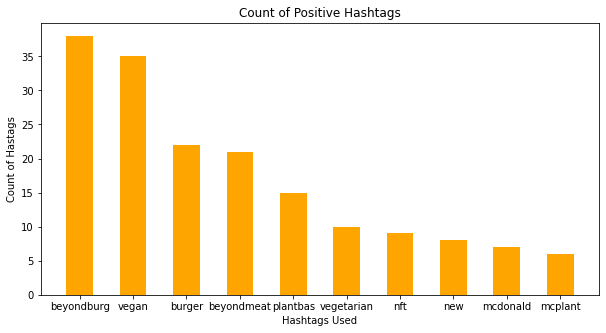

In [80]:
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(top_ten['Hashtags'], top_ten['Count'], color ='orange',
        width = 0.5)
plt.xlabel("Hashtags Used")
plt.ylabel("Count of Hastags")
plt.title("Count of Positive Hashtags")
plt.show()

### Frequency of hashtags from tweets with negative compound sentiment

In [73]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [74]:
word_freq_negative

FreqDist({'vegan': 16, 'beyondburg': 7, 'beyond': 5, 'plantbas': 4, 'burger': 4, 'fail': 2, 'orgonit': 2, 'artist': 2, 'art': 2, 'music': 2, ...})

In [75]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [76]:
sorted_df_negative = df_negative.sort_values(by='Count', ascending=False)

In [77]:
sorted_df_negative

Hashtags  Count
0               vegan     16
3          beyondburg      7
6              beyond      5
45           plantbas      4
56             burger      4
..                ...    ...
50                pei      1
48            cdnpoli      1
47          animallov      1
46         nodeadanim      1
125  lifestylemedicin      1

[126 rows x 2 columns]

In [78]:
top_ten_neg = sorted_df_negative.head(10)
top_ten_neg

Hashtags  Count
0         vegan     16
3    beyondburg      7
6        beyond      5
45     plantbas      4
56       burger      4
108   veganburg      2
57       nomeat      2
112        vend      2
113  healthyliv      2
114      nutrit      2

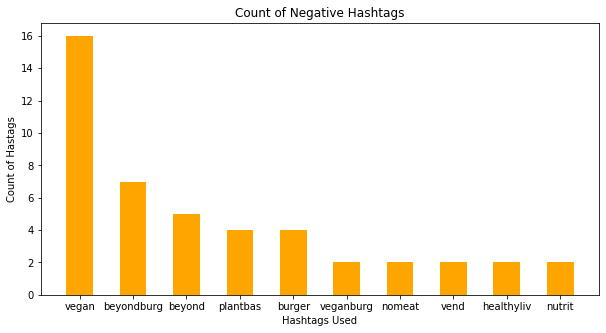

In [81]:
fig = plt.figure(figsize = (10, 5))
#  Bar plot
plt.bar(top_ten_neg['Hashtags'], top_ten_neg['Count'], color ='orange',
        width = 0.5)
plt.xlabel("Hashtags Used")
plt.ylabel("Count of Hastags")
plt.title("Count of Negative Hashtags")
plt.show()

In [82]:
!pip install dataframe-image

     |████████████████████████████████| 574 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 10.0 MB/s eta 0:00:01


In [83]:
import dataframe_image as dfi

In [84]:
dfi.export(sorted_df_positive, 'beyond_df_positive.png', max_rows=30)

In [85]:
dfi.export(sorted_df_negative, 'beyond_df_negative.png', max_rows=30)

## Part II : Training Machine Learning models to predict positive/negative sentiments of more tweets
### Create bag-of-words feature matrix

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

In [87]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [88]:
bow = bow_vectorizer.fit_transform(combine['Tidy_Tweets'])

In [89]:
df_bow = pd.DataFrame(bow.todense())
df_bow

0    1    2    3    4    5    6    7    8    9    ...  990  991  992  \
0       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
2       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
3       0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
4       0    0    0    0    0    1    0    0    0    0  ...    0    0    0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7995    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
7996    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
7997    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
7998    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
7999    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

      993  994  995  996  997  998  999  
0       0    0    0    0    0    0    0  
1       0    0    0    0    0    0    0  
2       0    0    0    0    0    0    0  
3       0    0    0    0    0    0    0  
4       0    0    0    0    0    0    0  
...   ...  ...  ...  ...  ...  ...  ...  
7995    0    0    0    0    0    0    0  
7996    0    0    0    0    0    0    0  
7997    0    0    0    0    0    0    0  
7998    0    0    0    0    0    0    0  
7999    0    0    0    0    0    0    0  

[8000 rows x 1000 columns]

### Create TF-IDF feature matrix

In [235]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [236]:
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

In [237]:
tfidf_matrix=tfidf.fit_transform(combine['Tidy_Tweets'])

In [238]:
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

0    1    2    3    4         5    6    7    8    9    ...  990  991  \
0     0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1     0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3     0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4     0.0  0.0  0.0  0.0  0.0  0.596379  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...   ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  ...  ...  ...   
7995  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
7996  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
7997  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
7998  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   
7999  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  ...  0.0  0.0   

      992  993  994  995  996  997  998  999  
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  
7995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
7999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[8000 rows x 1000 columns]

### Split into training set and validation set

In [239]:
train_bow = bow[:6000]
train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [240]:
train_tfidf_matrix = tfidf_matrix[:6000]
train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,train['sentiment_label'],test_size=0.3,random_state=2)

In [243]:
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train['sentiment_label'],test_size=0.3,random_state=17)

In [244]:
from sklearn.metrics import f1_score

### Model 1: Logistic Regression

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

#### Fit model with bag-of-words features

In [247]:
Log_Reg.fit(x_train_bow, y_train_bow)

LogisticRegression(random_state=0)

#### Predict probabilities of tweets having positive or negative classification for bag-of-words features

In [248]:
prediction_bow = Log_Reg.predict_proba(x_valid_bow)
prediction_bow

array([[0.91574436, 0.08425564],
       [0.88496879, 0.11503121],
       [0.56985954, 0.43014046],
       ...,
       [0.99871284, 0.00128716],
       [0.97679703, 0.02320297],
       [0.97596672, 0.02403328]])

In [249]:
prediction_int = prediction_bow[:,1]>=0.3

In [250]:
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 0, 1, ..., 0, 0, 0])

#### F1 score for bag-of-words features

In [251]:
log_bow = f1_score(y_valid_bow, prediction_int)
log_bow

0.5352112676056339

#### Fit model with TF-IDF features

In [252]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

#### Predict probabilities of tweets having positive or negative classification for TF-IDF features

In [253]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.91702899, 0.08297101],
       [0.58823591, 0.41176409],
       [0.84160724, 0.15839276],
       ...,
       [0.76804553, 0.23195447],
       [0.76960702, 0.23039298],
       [0.95595   , 0.04405   ]])

In [254]:
prediction_int = prediction_tfidf[:,1]>=0.3

In [255]:
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 1, 0, ..., 0, 0, 0])

#### F1 score for TF-IDF features

In [256]:
log_tfidf = f1_score(y_valid_tfidf, prediction_int)
log_tfidf

0.5174418604651162

### XGBoost

In [257]:
from xgboost import XGBClassifier

#### Fit model with bag-of-words features

In [259]:
model_bow = XGBClassifier(random_state=32,learning_rate=0.9)

In [260]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=32,
              reg_alpha=0, reg_lambda=1, ...)

#### Predict probabilities of tweets having positive or negative classification for bag-of-words features

In [261]:
xgb = model_bow.predict_proba(x_valid_bow)
xgb

array([[9.2570120e-01, 7.4298792e-02],
       [8.3011371e-01, 1.6988628e-01],
       [8.6987126e-01, 1.3012874e-01],
       ...,
       [9.9923539e-01, 7.6461182e-04],
       [9.9797755e-01, 2.0224277e-03],
       [9.1182119e-01, 8.8178806e-02]], dtype=float32)

In [262]:
xgb=xgb[:,1]>=0.3

In [263]:
xgb_int=xgb.astype(np.int)

#### F1 score for bag-of-words features

In [265]:
xgb_bow=f1_score(y_valid_bow,xgb_int)
xgb_bow

0.5220994475138122

#### Fit model with TF-IDF features

In [268]:
model_tfidf = XGBClassifier(random_state=29,learning_rate=0.7)

In [269]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=29,
              reg_alpha=0, reg_lambda=1, ...)

#### Predict probabilities of tweets having positive or negative classification for TF-IDF features

In [270]:
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)
xgb_tfidf

array([[0.9423549 , 0.05764508],
       [0.8260219 , 0.1739781 ],
       [0.96590275, 0.03409726],
       ...,
       [0.91749644, 0.08250353],
       [0.7778815 , 0.22211847],
       [0.9969041 , 0.00309593]], dtype=float32)

In [271]:
xgb_tfidf=xgb_tfidf[:,1]>=0.3

In [272]:
xgb_int_tfidf=xgb_tfidf.astype(np.int)

#### F1 score for TF-IDF features

In [273]:
score=f1_score(y_valid_tfidf,xgb_int_tfidf)
score

0.47578347578347574

### Decision Trees

In [274]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

#### Fit model with bag-of-words features

In [275]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

#### Predict probabilities of tweets having positive or negative classification for bag-of-words features

dct_bow = dct.predict_proba(x_valid_bow)
dct_bow

In [277]:
dct_bow=dct_bow[:,1]>=0.3

In [278]:
dct_int_bow=dct_bow.astype(np.int)

#### F1 score for bag-of-words features

In [279]:
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)
dct_score_bow

0.4406779661016949

#### Fit model with TF-IDF features

In [280]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

#### Predict probabilities of tweets having positive or negative classification for TF-IDF features

In [281]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)
dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [282]:
dct_tfidf=dct_tfidf[:,1]>=0.3

In [283]:
dct_int_tfidf=dct_tfidf.astype(np.int)

#### F1 score for TF-IDF features

In [284]:
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)
dct_score_tfidf

0.41470588235294126

### Model Comparison

In [285]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)']

In [287]:
score_1 = [log_bow,xgb_bow,dct_score_bow]

In [289]:
compare_1 = pd.DataFrame({'Model':Algo_1,'F1_Score':score_1},index=[i for i in range(1,4)])

#### F1 score of different models using bag-of-words features

In [290]:
compare_1.T

1                      2  \
Model     LogisticRegression(Bag-of-Words)  XGBoost(Bag-of-Words)   
F1_Score                          0.535211               0.522099   

                                   3  
Model     DecisionTree(Bag-of-Words)  
F1_Score                    0.440678

In [291]:
import seaborn as sns

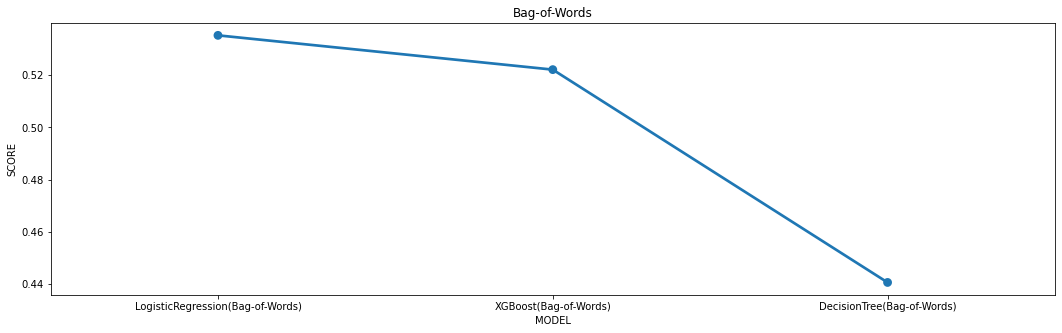

In [292]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_1)

plt.title('Bag-of-Words')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [293]:
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

In [294]:
score_2 = [log_tfidf,score,dct_score_tfidf]

In [295]:
compare_2 = pd.DataFrame({'Model':Algo_2,'F1_Score':score_2},index=[i for i in range(1,4)])

#### F1 score of different models using TF-IDF features

In [296]:
compare_2.T

1                2                     3
Model     LogisticRegression(TF-IDF)  XGBoost(TF-IDF)  DecisionTree(TF-IDF)
F1_Score                    0.517442         0.475783              0.414706

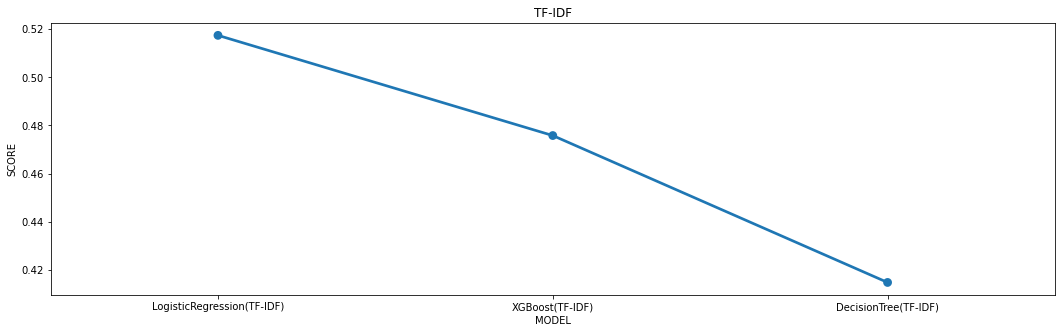

In [297]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_2)

plt.title('TF-IDF')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

In [298]:
Algo_best = ['LogisticRegression(Bag-of-Words)','LogisticRegression(TF-IDF)']

In [299]:
score_best = [log_bow,log_tfidf]

In [300]:
compare_best = pd.DataFrame({'Model':Algo_best,'F1_Score':score_best},index=[i for i in range(1,3)])

#### Compare logistic regression F1 scores for bag-of-words and TF-IDF features

In [301]:
compare_best.T

1                           2
Model     LogisticRegression(Bag-of-Words)  LogisticRegression(TF-IDF)
F1_Score                          0.535211                    0.517442

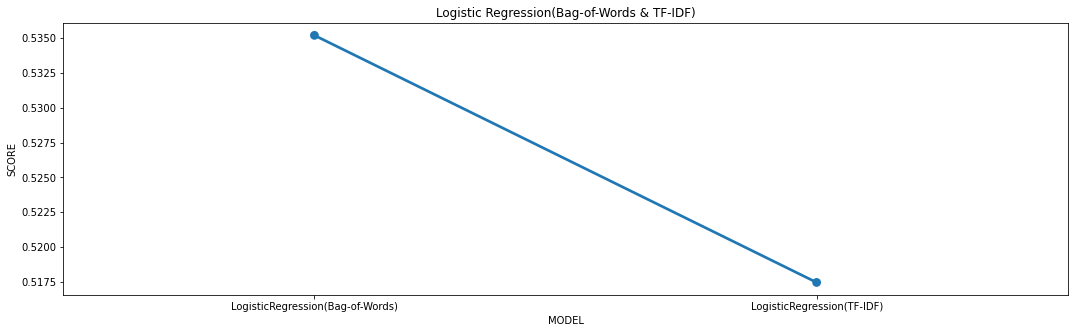

In [302]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare_best)

plt.title('Logistic Regression(Bag-of-Words & TF-IDF)')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

### Predict results of test data via logisitic regression model using bag-of-words features

In [303]:
test_bow = bow[6000:]

In [304]:
test_pred = Log_Reg.predict_proba(test_bow)

In [305]:
test_pred_int = test_pred[:,1] >= 0.3

In [306]:
test_pred_int = test_pred_int.astype(np.int)

In [307]:
test['label'] = test_pred_int

In [308]:
submission = test[['tweet','label']]

In [309]:
submission.to_csv('result_beyond.csv', index=False)

In [310]:
res = pd.read_csv('result_beyond.csv')
res

tweet  label
0     @Northernlion But does it beat the *plants* of...      0
1     @Northernlion I like the Beyond products bette...      0
2     @BurgerKing Monique@ Burger King 012725 in You...      1
3     TW//eating, stress\n-\n-\nwhen im bored or wan...      1
4     @Northernlion yeah the Beyond is ok but straig...      0
...                                                 ...    ...
1995  @ariadneconill It's a beyond burger with tomat...      0
1996  I think the beyond meat burgers are better tha...      0
1997  got a beyond meat burger for my first break &g...      0
1998  @JohnRush32 Impossible Burger...White Sharp Ch...      0
1999  @ccmcleod @BeyondMeat Audri eats all those bey...      0

[2000 rows x 2 columns]